# ***PCA***

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None
             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  17

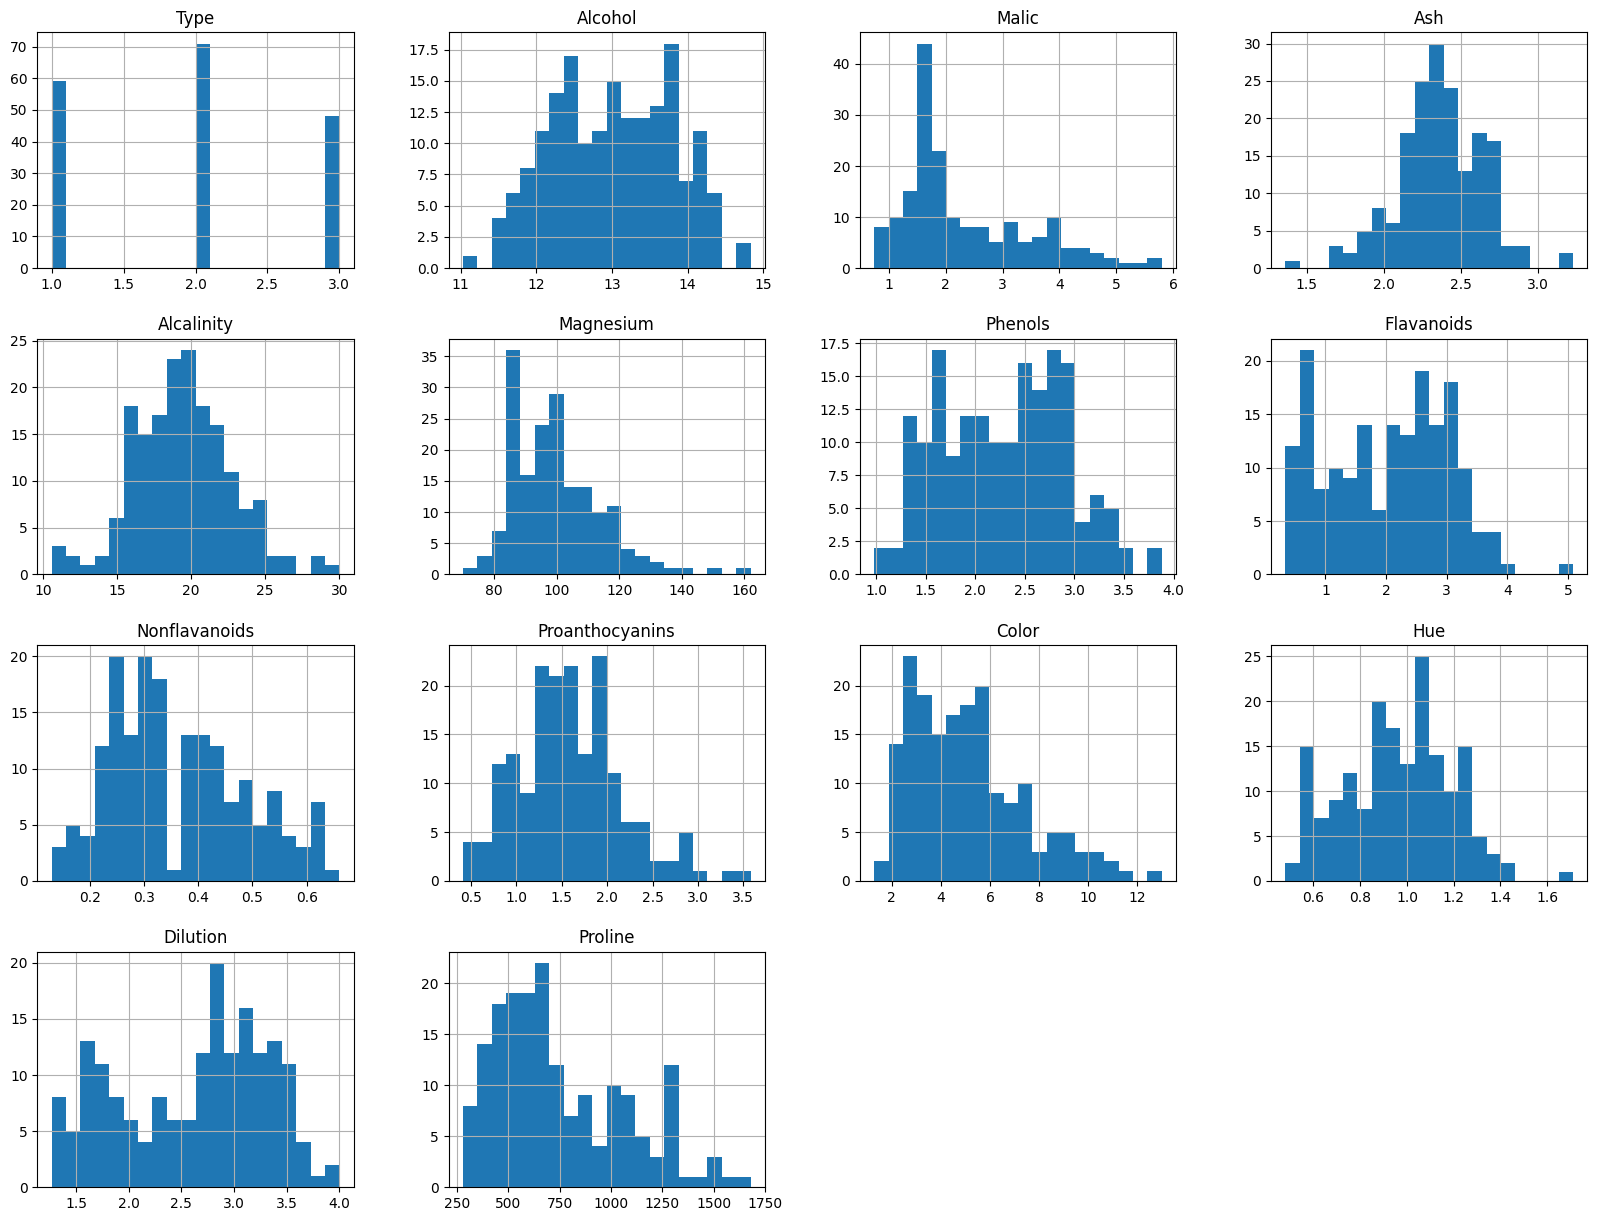

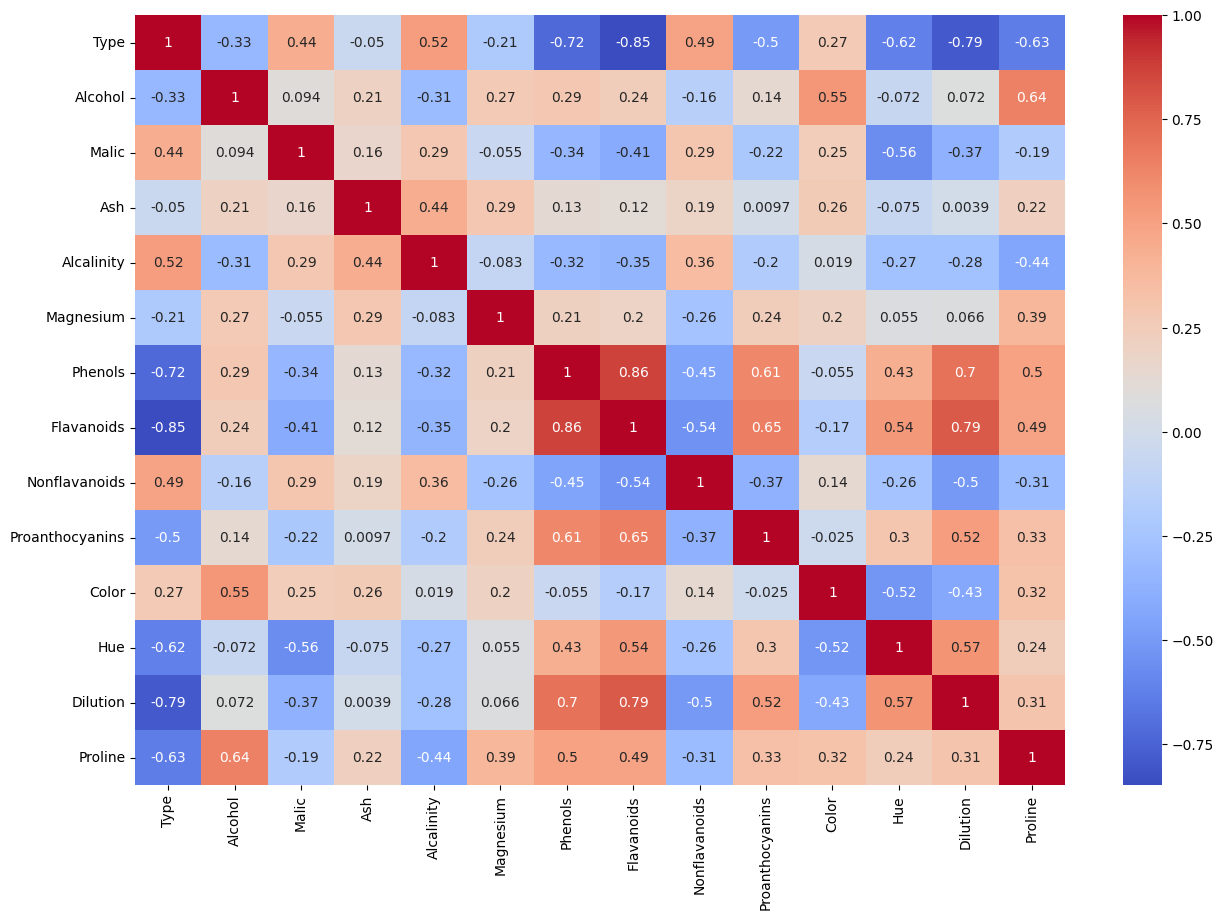

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/sample_data/wine.csv')

# Display basic information about the dataset
print(df.info())
print(df.describe())

# Visualize distributions of features
df.hist(bins=20, figsize=(20, 15))
plt.show()

# Investigate correlations between features
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [2]:
from sklearn.preprocessing import StandardScaler

# Separating out the features
features = df.columns[1:]  # Assuming the first column is the target
x = df.loc[:, features].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

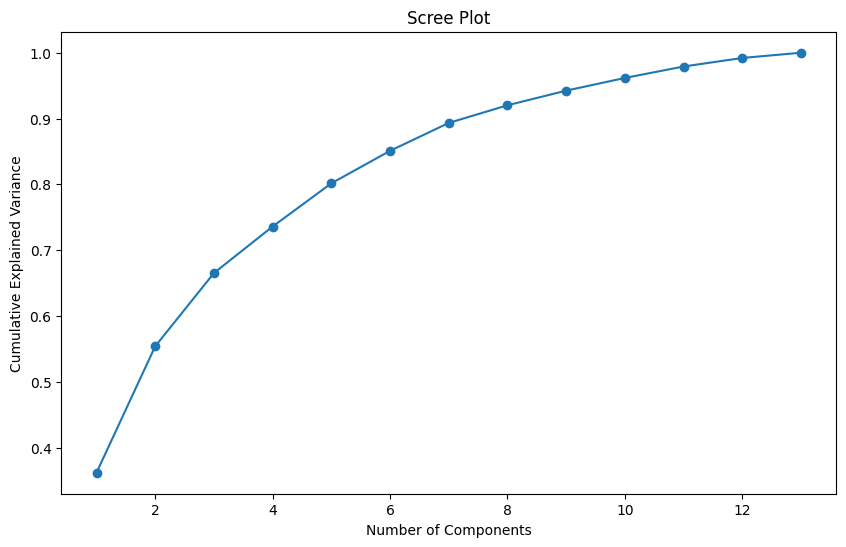

In [3]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA()
principalComponents = pca.fit_transform(x)

# Determine the optimal number of components
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()

# Transform the original dataset into principal components
n_components = 2  # for example, choose 2 components
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=[f'PC{i+1}' for i in range(n_components)])

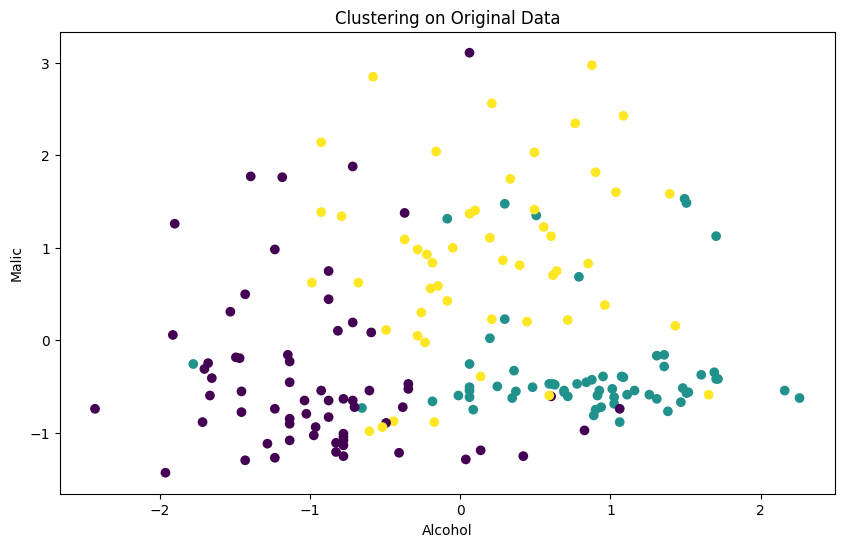

Silhouette Score (Original Data): 0.2848589191898987
Davies-Bouldin Index (Original Data): 1.3891879777181648


In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Apply K-means clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
clusters_original = kmeans.labels_

# Visualize clustering results
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0], x[:, 1], c=clusters_original, cmap='viridis')
plt.title('Clustering on Original Data')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.show()

# Evaluate clustering performance
sil_score_original = silhouette_score(x, clusters_original)
db_score_original = davies_bouldin_score(x, clusters_original)
print(f'Silhouette Score (Original Data): {sil_score_original}')
print(f'Davies-Bouldin Index (Original Data): {db_score_original}')

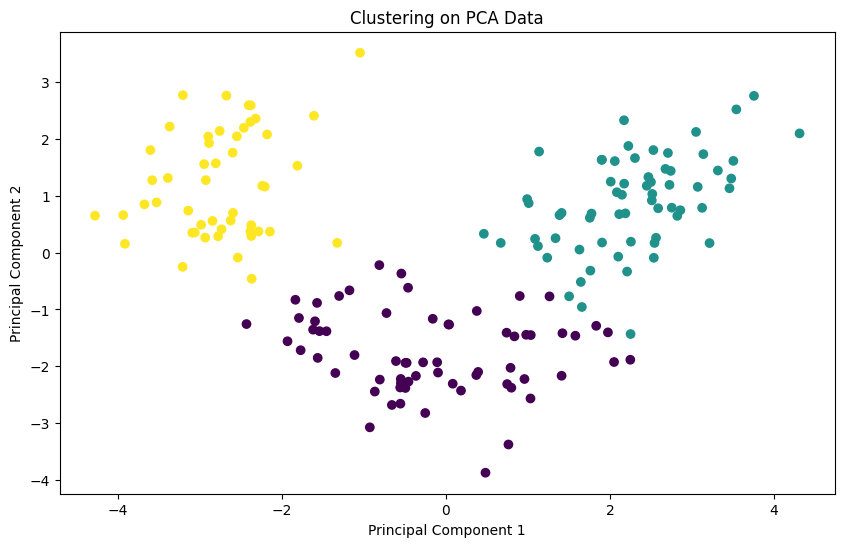

Silhouette Score (PCA Data): 0.5610505693103248
Davies-Bouldin Index (PCA Data): 0.5972661544221362


In [5]:
# Apply K-means clustering to PCA data
kmeans_pca = KMeans(n_clusters=3)
kmeans_pca.fit(principalComponents)
clusters_pca = kmeans_pca.labels_

# Visualize clustering results
plt.figure(figsize=(10, 6))
plt.scatter(principalDf['PC1'], principalDf['PC2'], c=clusters_pca, cmap='viridis')
plt.title('Clustering on PCA Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Evaluate clustering performance
sil_score_pca = silhouette_score(principalComponents, clusters_pca)
db_score_pca = davies_bouldin_score(principalComponents, clusters_pca)
print(f'Silhouette Score (PCA Data): {sil_score_pca}')
print(f'Davies-Bouldin Index (PCA Data): {db_score_pca}')

In [6]:
print(f'Original Data: Silhouette Score = {sil_score_original}, Davies-Bouldin Index = {db_score_original}')
print(f'PCA Data: Silhouette Score = {sil_score_pca}, Davies-Bouldin Index = {db_score_pca}')

Original Data: Silhouette Score = 0.2848589191898987, Davies-Bouldin Index = 1.3891879777181648
PCA Data: Silhouette Score = 0.5610505693103248, Davies-Bouldin Index = 0.5972661544221362


In [7]:
# Practical implications and recommendations
print("PCA can significantly reduce dimensionality, making clustering more efficient.")
print("In this example, PCA-transformed data may result in comparable or better clustering performance.")
print("When to use PCA: When dealing with high-dimensional data, to remove redundancy, and improve computational efficiency.")

PCA can significantly reduce dimensionality, making clustering more efficient.
In this example, PCA-transformed data may result in comparable or better clustering performance.
When to use PCA: When dealing with high-dimensional data, to remove redundancy, and improve computational efficiency.
